In [1]:
import pandas as pd
df = pd.read_csv("dataset\ILPD\ilpd.csv")
df.head()

,age,gender,tb,db,alkphos,sgpt,sgot,tp,alb,ag_ratio,class
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [2]:
LD, NLD = df['class'].value_counts()
print('Number of patients diagnosed with liver disease: ',LD)
print('Number of patients not diagnosed with liver disease: ',NLD)

Number of patients diagnosed with liver disease:  416
Number of patients not diagnosed with liver disease:  167


In [3]:
df['class'].value_counts()

1    416
2    167
Name: class, dtype: int64

In [4]:
df['class'] = df['class'].apply(lambda x: 0 if x == 2 else x)

In [5]:
df['class'].value_counts()

1    416
0    167
Name: class, dtype: int64

In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report

# Load your dataset
data = df.copy().dropna()

# Identify non-numeric columns and encode them using Label Encoding
non_numeric_columns = data.select_dtypes(include=['object']).columns
label_encoders = {}

for col in non_numeric_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Standardize numeric columns (excluding 'class') using StandardScaler
numeric_columns = data.select_dtypes(include=[np.number]).columns
numeric_columns = numeric_columns.drop('class')
scaler = StandardScaler()
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

# Assuming 'class' is the column with binary labels (0 for Healthy, 1 for Disease)
X = data.drop('class', axis=1)
y = data['class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Predict the probabilities of disease
risk_probabilities = model.predict_proba(X)[:, 1]

# Predict the class labels
predictions = model.predict(X)

# Calculate risk factors (percentages) based on predicted probabilities
risk_factors = risk_probabilities * 100

# Create a dataframe to store results
results_df = pd.DataFrame({
    'Sample': range(1, len(X) + 1),
    'Risk Factor': risk_factors,
    'Predicted Label': ['Healthy' if label == 0 else 'Disease' for label in predictions],
    'Original Label': ['Healthy' if label == 0 else 'Disease' for label in y]
})


# Classification report for training set
train_predictions = model.predict(X_train)
train_report = classification_report(y_train, train_predictions)
print("Training Set Classification Report:")
print(train_report)

# Classification report for test set
test_predictions = model.predict(X_test)
test_report = classification_report(y_test, test_predictions)
print("Test Set Classification Report:")
print(test_report)


Training Set Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.14      0.23       122
           1       0.76      0.97      0.85       341

    accuracy                           0.75       463
   macro avg       0.69      0.56      0.54       463
weighted avg       0.73      0.75      0.69       463

Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.09      0.17        43
           1       0.65      0.99      0.78        73

    accuracy                           0.66       116
   macro avg       0.72      0.54      0.47       116
weighted avg       0.70      0.66      0.55       116



In [7]:
results_df

,Sample,Risk Factor,Predicted Label,Original Label
0,1,67.330921,Disease,Disease
1,2,98.686588,Disease,Disease
2,3,95.583825,Disease,Disease
3,4,65.704616,Disease,Disease
4,5,92.209914,Disease,Disease
...,...,...,...,...
574,575,85.314202,Disease,Healthy
575,576,52.449471,Disease,Disease
576,577,70.314173,Disease,Disease
577,578,59.099118,Disease,Disease


In [8]:
df_combined_risk_factor = pd.concat([df, results_df], axis=1)
df_combined_risk_factor.head()

,age,gender,tb,db,alkphos,sgpt,sgot,tp,alb,ag_ratio,class,Sample,Risk Factor,Predicted Label,Original Label
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1,1.0,67.330921,Disease,Disease
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1,2.0,98.686588,Disease,Disease
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1,3.0,95.583825,Disease,Disease
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1,4.0,65.704616,Disease,Disease
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1,5.0,92.209914,Disease,Disease


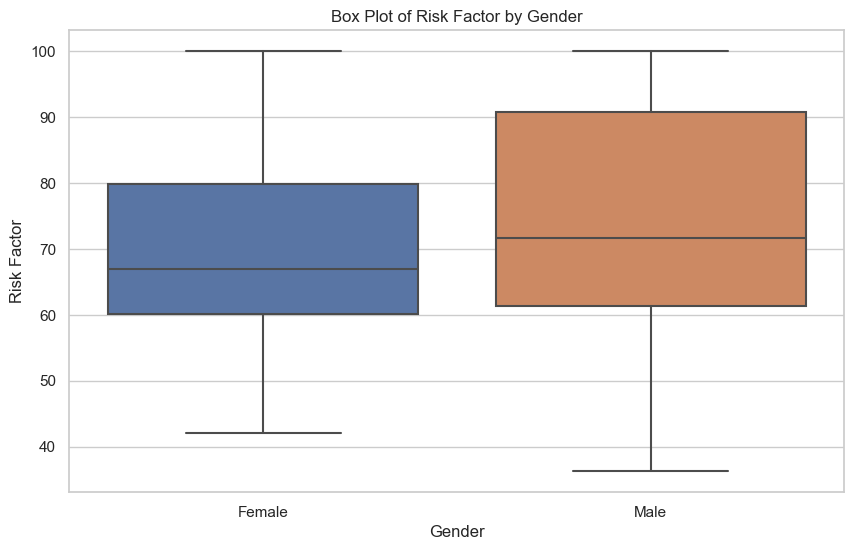

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your DataFrame (replace 'df' with the actual name of your DataFrame)
# For example: df = pd.read_csv('your_data.csv')
# Make sure your DataFrame has 'gender' and 'risk_factor' columns

# Set up the Seaborn style
sns.set(style="whitegrid")

# Create the box plot using Seaborn
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.boxplot(x='gender', y='Risk Factor', data=df_combined_risk_factor)

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Risk Factor')
plt.title('Box Plot of Risk Factor by Gender')

# Show the plot
# plt.show()
plt.savefig('output/gender_risk_factor.png')


In [13]:
# Define the age ranges for your groups
bins = [0, 25, 60, df['age'].max()]
labels = ['Young', 'Middle-Aged', 'Elderly']

# Use pd.cut() to create the 'age_group' column
df_combined_risk_factor['age_group'] = pd.cut(df_combined_risk_factor['age'], bins=bins, labels=labels, right=False)

In [14]:
df_combined_risk_factor.head()

,age,gender,tb,db,alkphos,sgpt,sgot,tp,alb,ag_ratio,class,Sample,Risk Factor,Predicted Label,Original Label,age_group
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1,1.0,67.330921,Disease,Disease,Elderly
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1,2.0,98.686588,Disease,Disease,Elderly
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1,3.0,95.583825,Disease,Disease,Elderly
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1,4.0,65.704616,Disease,Disease,Middle-Aged
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1,5.0,92.209914,Disease,Disease,Elderly


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


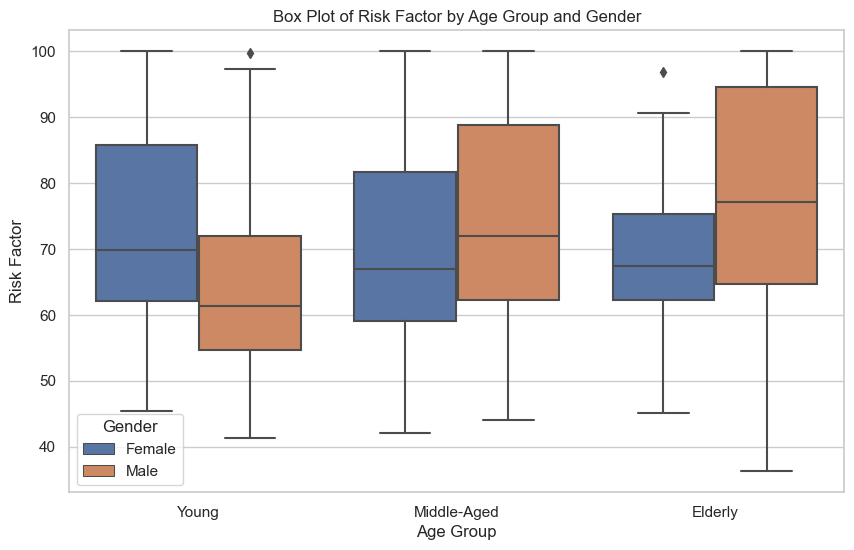

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your DataFrame (replace 'df' with the actual name of your DataFrame)
# For example: df = pd.read_csv('your_data.csv')
# Make sure your DataFrame has 'gender', 'age_group', and 'risk_factor' columns


# Set up the Seaborn style
sns.set(style="whitegrid")

# Create the box plot using Seaborn
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.boxplot(x='age_group', y='Risk Factor', hue='gender', data=df_combined_risk_factor)

# Add labels and title
plt.xlabel('Age Group')
plt.ylabel('Risk Factor')
plt.title('Box Plot of Risk Factor by Age Group and Gender')

# Show the legend
plt.legend(title='Gender')

# Show the plot
# plt.show()
plt.savefig('output/gender_age_risk_factor.eps')
